Handwritten Digit Recognition

In [41]:
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sn
import numpy as np
import pandas as pd
import math
import datetime
import platform

print('Python version:', platform.python_version())
print('Tensorflow version:', tf.__version__)
print('Keras version:', tf.keras.__version__)

Python version: 3.7.13
Tensorflow version: 2.8.2
Keras version: 2.8.0


In [42]:
# Load the TensorBoard notebook extension.
# %reload_ext tensorboard
%load_ext tensorboard

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


In [43]:
mnist_dataset = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist_dataset.load_data()

In [46]:
print('x_train:', x_train.shape)
print('y_train:', y_train.shape)
print('x_test:', x_test.shape)
print('y_test:', y_test.shape)

x_train: (60000, 28, 28)
y_train: (60000,)
x_test: (10000, 28, 28)
y_test: (10000,)


In [47]:
# Save image parameters to the constants that we will use later for data re-shaping and for model traning.
(_, IMAGE_WIDTH, IMAGE_HEIGHT) = x_train.shape
IMAGE_CHANNELS = 1

print('IMAGE_WIDTH:', IMAGE_WIDTH);
print('IMAGE_HEIGHT:', IMAGE_HEIGHT);
print('IMAGE_CHANNELS:', IMAGE_CHANNELS);

IMAGE_WIDTH: 28
IMAGE_HEIGHT: 28
IMAGE_CHANNELS: 1


In [48]:
pd.DataFrame(x_train[0])

,0,1,2,3,4,5,6,7,8,9,...,18,19,20,21,22,23,24,25,26,27
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,175,26,166,255,247,127,0,0,0,0
6,0,0,0,0,0,0,0,0,30,36,...,225,172,253,242,195,64,0,0,0,0
7,0,0,0,0,0,0,0,49,238,253,...,93,82,82,56,39,0,0,0,0,0
8,0,0,0,0,0,0,0,18,219,253,...,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,80,156,...,0,0,0,0,0,0,0,0,0,0


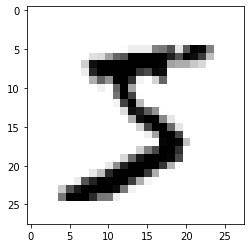

In [49]:
plt.imshow(x_train[0], cmap=plt.cm.binary)
plt.show()

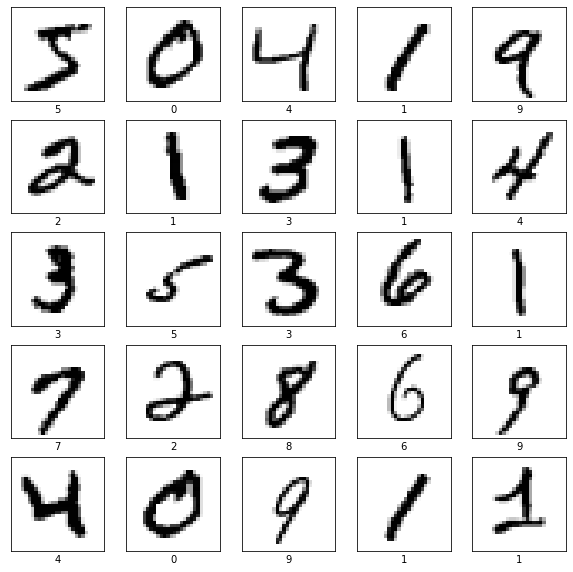

In [50]:
numbers_to_display = 25
num_cells = math.ceil(math.sqrt(numbers_to_display))
plt.figure(figsize=(10,10))
for i in range(numbers_to_display):
    plt.subplot(num_cells, num_cells, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[i], cmap=plt.cm.binary)
    plt.xlabel(y_train[i])
plt.show()

In [52]:
x_train_with_chanels = x_train.reshape(
    x_train.shape[0],
    IMAGE_WIDTH,
    IMAGE_HEIGHT,
    IMAGE_CHANNELS
)

x_test_with_chanels = x_test.reshape(
    x_test.shape[0],
    IMAGE_WIDTH,
    IMAGE_HEIGHT,
    IMAGE_CHANNELS
)

In [53]:
print('x_train_with_chanels:', x_train_with_chanels.shape)
print('x_test_with_chanels:', x_test_with_chanels.shape)

x_train_with_chanels: (60000, 28, 28, 1)
x_test_with_chanels: (10000, 28, 28, 1)


Normalize the data

Here we're just trying to move from values range of [0...255] to [0...1].

In [54]:
x_train_normalized = x_train_with_chanels / 255
x_test_normalized = x_test_with_chanels / 255

In [55]:
# Let's check just one row from the 0th image to see color chanel values after normalization.
x_train_normalized[0][18]

array([[0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.18039216],
       [0.50980392],
       [0.71764706],
       [0.99215686],
       [0.99215686],
       [0.81176471],
       [0.00784314],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ]])

Build the model

In [57]:
# Sequential Keras model with two pairs of Convolution2D and MaxPooling2D layers.

model = tf.keras.models.Sequential()

model.add(tf.keras.layers.Convolution2D(
    input_shape=(IMAGE_WIDTH, IMAGE_HEIGHT, IMAGE_CHANNELS),
    kernel_size=5,
    filters=8,
    strides=1,
    activation=tf.keras.activations.relu,
    kernel_initializer=tf.keras.initializers.VarianceScaling()
))

model.add(tf.keras.layers.MaxPooling2D(
    pool_size=(2, 2),
    strides=(2, 2)
))

model.add(tf.keras.layers.Convolution2D(
    kernel_size=5,
    filters=16,
    strides=1,
    activation=tf.keras.activations.relu,
    kernel_initializer=tf.keras.initializers.VarianceScaling()
))

model.add(tf.keras.layers.MaxPooling2D(
    pool_size=(2, 2),
    strides=(2, 2)
))

model.add(tf.keras.layers.Flatten())

model.add(tf.keras.layers.Dense(
    units=128,
    activation=tf.keras.activations.relu
));

model.add(tf.keras.layers.Dropout(0.2))

model.add(tf.keras.layers.Dense(
    units=10,
    activation=tf.keras.activations.softmax,
    kernel_initializer=tf.keras.initializers.VarianceScaling()
))


In [58]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 24, 24, 8)         208       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 12, 12, 8)        0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 8, 8, 16)          3216      
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 4, 4, 16)         0         
 2D)                                                             
                                                                 
 flatten_2 (Flatten)         (None, 256)               0         
                                                                 
 dense_4 (Dense)             (None, 128)              

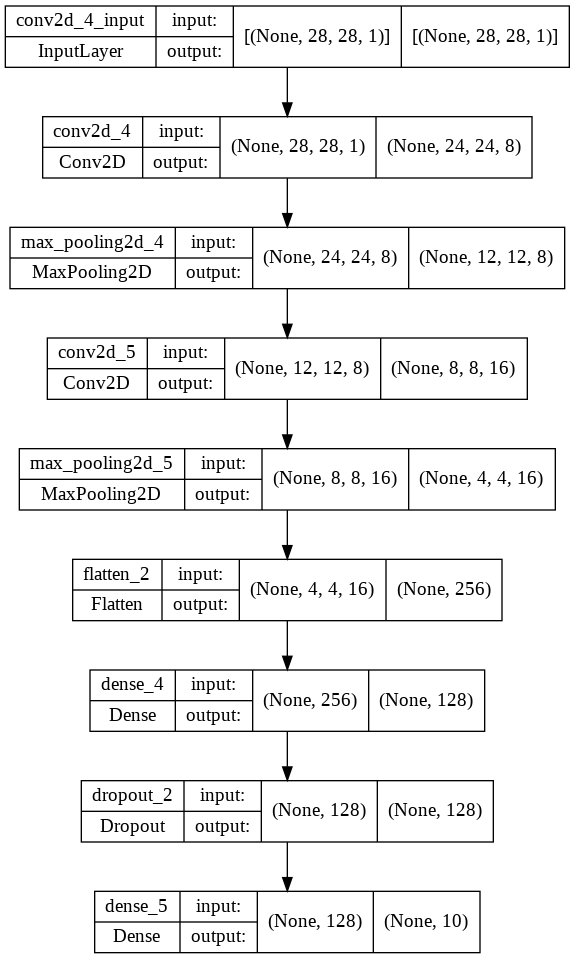

In [59]:
tf.keras.utils.plot_model(                      #plot the model using graphviz 
    model,
    show_shapes=True,
    show_layer_names=True,
)

Compile the model

In [60]:
adam_optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)

model.compile(
    optimizer=adam_optimizer,
    loss=tf.keras.losses.sparse_categorical_crossentropy,
    metrics=['accuracy']
)

Train the model

In [61]:
log_dir=".logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)

training_history = model.fit(
    x_train_normalized,
    y_train,
    epochs=10,
    validation_data=(x_test_normalized, y_test),
    callbacks=[tensorboard_callback]
)

Epoch 1/10
1875/1875 [==============================] - 29s 15ms/step - loss: 0.2074 - accuracy: 0.9358 - val_loss: 0.0545 - val_accuracy: 0.9829
Epoch 2/10
1875/1875 [==============================] - 29s 16ms/step - loss: 0.0683 - accuracy: 0.9795 - val_loss: 0.0417 - val_accuracy: 0.9868
Epoch 3/10
1875/1875 [==============================] - 31s 17ms/step - loss: 0.0485 - accuracy: 0.9849 - val_loss: 0.0415 - val_accuracy: 0.9862
Epoch 4/10
1875/1875 [==============================] - 29s 15ms/step - loss: 0.0384 - accuracy: 0.9880 - val_loss: 0.0336 - val_accuracy: 0.9889
Epoch 5/10
1875/1875 [==============================] - 28s 15ms/step - loss: 0.0335 - accuracy: 0.9897 - val_loss: 0.0318 - val_accuracy: 0.9901
Epoch 6/10
1875/1875 [==============================] - 28s 15ms/step - loss: 0.0288 - accuracy: 0.9911 - val_loss: 0.0372 - val_accuracy: 0.9885
Epoch 7/10
1875/1875 [==============================] - 29s 15ms/step - loss: 0.0241 - accuracy: 0.9919 - val_loss: 0.0411 -

Let's see how the loss function was changing during the training. We expect it to get smaller and smaller on every next epoch.



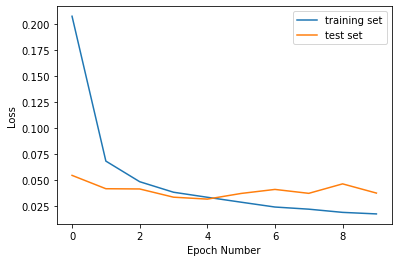

In [62]:
plt.xlabel('Epoch Number')
plt.ylabel('Loss')
plt.plot(training_history.history['loss'], label='training set')
plt.plot(training_history.history['val_loss'], label='test set')
plt.legend()

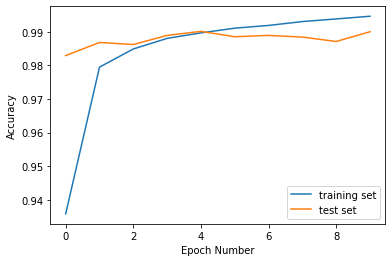

In [63]:
plt.xlabel('Epoch Number')
plt.ylabel('Accuracy')
plt.plot(training_history.history['accuracy'], label='training set')
plt.plot(training_history.history['val_accuracy'], label='test set')
plt.legend()

Evaluate model accuracy
We need to compare the accuracy of our model on training set and on test set the trained model to perform similarly on both sets.

Training set accuracy

In [64]:
%%capture
train_loss, train_accuracy = model.evaluate(x_train_normalized, y_train)

In [65]:
print('Training loss: ', train_loss)
print('Training accuracy: ', train_accuracy)

Training loss:  0.00762903830036521
Training accuracy:  0.9974833130836487


Test set accuracy

In [66]:
%%capture
validation_loss, validation_accuracy = model.evaluate(x_test_normalized, y_test)

In [67]:
print('Validation loss: ', validation_loss)
print('Validation accuracy: ', validation_accuracy)

Validation loss:  0.03754904121160507
Validation accuracy:  0.9900000095367432


Save the model

In [68]:
model_name = 'digits_recognition_cnn.h5'
model.save(model_name, save_format='h5')

In [69]:
loaded_model = tf.keras.models.load_model(model_name)

In [70]:
predictions_one_hot = loaded_model.predict([x_test_normalized])   #use predict() method to predict digit


In [71]:
print('predictions_one_hot:', predictions_one_hot.shape)

predictions_one_hot: (10000, 10)


Each prediction consists of 10 probabilities (one for each number from 0 to 9). We need to pick the digit with the highest probability since this would be a digit that our model most confident with.

In [72]:
# Predictions in form of one-hot vectors (arrays of probabilities).
pd.DataFrame(predictions_one_hot)

,0,1,2,3,4,5,6,7,8,9
0,1.181820e-10,1.640661e-09,3.803803e-09,1.771572e-07,1.017853e-09,3.352518e-10,5.971910e-16,9.999999e-01,8.785988e-12,1.081200e-08
1,6.876310e-10,6.987218e-11,1.000000e+00,1.144222e-13,3.130809e-17,2.112981e-16,2.142466e-11,1.183096e-11,4.700480e-15,1.377410e-17
2,1.455124e-08,9.999958e-01,9.226252e-08,7.444146e-13,1.922605e-06,3.427926e-09,1.073539e-08,1.308077e-07,1.985729e-06,1.919531e-10
3,9.999994e-01,1.033422e-13,2.161214e-10,2.545843e-10,6.106524e-12,9.065019e-12,6.334524e-07,1.393303e-13,2.114357e-10,5.091418e-09
4,2.180343e-10,6.490530e-11,2.366279e-11,2.194786e-12,9.999999e-01,1.194056e-13,9.395622e-11,2.188041e-11,4.924698e-11,8.742760e-08
...,...,...,...,...,...,...,...,...,...,...
9995,4.647120e-12,4.222897e-09,9.999989e-01,3.526376e-10,4.344354e-14,1.801792e-16,1.396118e-14,1.101299e-06,1.707208e-12,1.188466e-15
9996,3.336604e-12,5.374505e-09,3.468084e-12,9.999999e-01,1.181672e-17,8.519263e-08,6.000399e-19,2.162128e-12,3.949232e-12,7.448715e-11
9997,4.964289e-19,1.888181e-12,4.306723e-17,1.227220e-20,1.000000e+00,1.390810e-17,1.582874e-18,4.847463e-14,3.665571e-12,2.270681e-15
9998,2.432093e-10,3.885360e-14,1.692786e-19,4.388074e-08,8.361954e-20,9.999993e-01,9.852117e-12,6.780062e-21,6.786016e-07,1.949229e-15


In [73]:
# Let's extract predictions with highest probabilites and detect what digits have been actually recognized.
predictions = np.argmax(predictions_one_hot, axis=1)
pd.DataFrame(predictions)

,0
0,7
1,2
2,1
3,0
4,4
...,...
9995,2
9996,3
9997,4
9998,5


In [74]:
print(predictions[4])

4


Let's print the fourth image from a test set to see if model's prediction is correct.

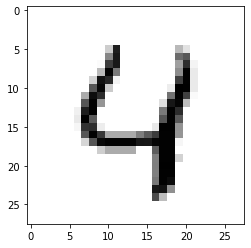

In [75]:
plt.imshow(x_test_normalized[4].reshape((IMAGE_WIDTH, IMAGE_HEIGHT)), cmap=plt.cm.binary)
plt.show()

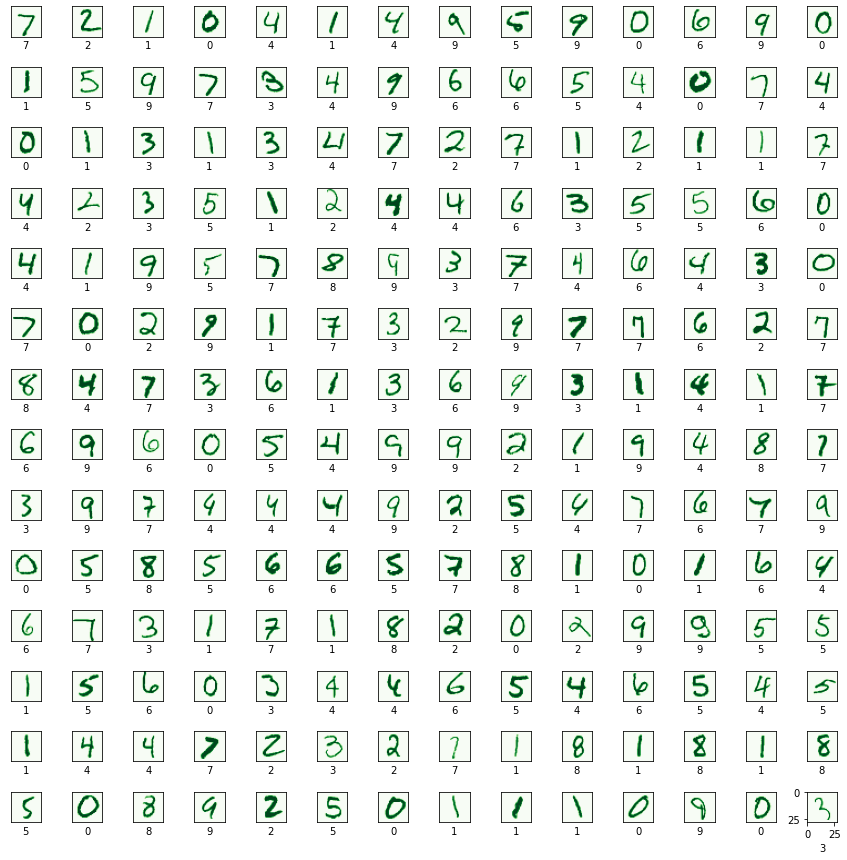

In [76]:
numbers_to_display = 196
num_cells = math.ceil(math.sqrt(numbers_to_display))
plt.figure(figsize=(15, 15))

for plot_index in range(numbers_to_display):    
    predicted_label = predictions[plot_index]
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    color_map = 'Greens' if predicted_label == y_test[plot_index] else 'Reds'
    plt.subplot(num_cells, num_cells, plot_index + 1)
    plt.imshow(x_test_normalized[plot_index].reshape((IMAGE_WIDTH, IMAGE_HEIGHT)), cmap=color_map)
    plt.xlabel(predicted_label)

plt.subplots_adjust(hspace=1, wspace=0.5)
plt.show()

Plotting a confusion matrix

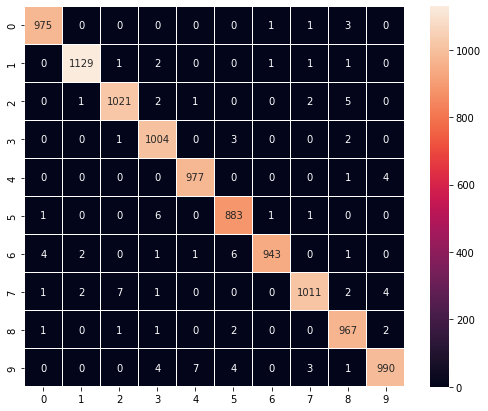

In [77]:
confusion_matrix = tf.math.confusion_matrix(y_test, predictions)
f, ax = plt.subplots(figsize=(9, 7))
sn.heatmap(
    confusion_matrix,
    annot=True,
    linewidths=.5,
    fmt="d",
    square=True,
    ax=ax
)
plt.show()